In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso



In [29]:
compiledcountydata_dir = "https://raw.githubusercontent.com/jaredbarkley0/PythonGroupProject/master/MN%20County%20Data_032721.csv"
compiledcountydata = pd.read_csv(compiledcountydata_dir)
compiledcountydata

,Unnamed: 0,County,Total Positive Cases,Total Deaths,Population,Rate of Infection,Pop Density,Mean Household Size,Congregate Living Population,No. of Cases in Nursing Homes,No. of Nursing Homes in County,"Nursing Home Cases, % of Total",Cases per number of Nursing Home
0,0,Aitkin,1191,33,15870.0,0.075047,8.0,2.097233,254.0,118.0,4.0,0.099076,29.500000
1,1,Anoka,33391,390,362648.0,0.092076,753.9,2.712716,3753.0,1675.0,35.0,0.050163,47.857143
2,2,Becker,3131,42,34545.0,0.090635,22.8,2.393929,477.0,294.0,8.0,0.093900,36.750000
3,3,Beltrami,3386,51,47184.0,0.071762,14.8,2.487013,1990.0,264.0,11.0,0.077968,24.000000
4,4,Benton,4482,90,40895.0,0.109598,94.4,2.426614,1050.0,557.0,11.0,0.124275,50.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,Watonwan,1176,8,10923.0,0.107663,25.4,2.397507,151.0,36.0,3.0,0.030612,12.000000
83,83,Wilkin,677,11,6226.0,0.108738,8.7,2.238850,152.0,36.0,2.0,0.053176,18.000000
84,84,Winona,4193,49,50830.0,0.082491,79.9,2.352632,3855.0,277.0,9.0,0.066062,30.777778
85,85,Wright,12554,116,138531.0,0.090622,178.3,2.796739,1158.0,687.0,20.0,0.054724,34.350000


In [30]:
#Fill NaN values for all facility-related data points with 0, which is an equivalent value in this case
fillfacilitiesdata = {'Casesinfacility':0,'FacilitiesinCounty':0,'Percent Cases in Facilities':0,'Cases per number of Facilities':0}
compiledcountydata.fillna(fillfacilitiesdata, inplace=True)

In [31]:
#drops all na's in dataset
compiledcountydata.dropna(inplace=True)

In [32]:
#shows data info
compiledcountydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        87 non-null     int64  
 1   County                            87 non-null     object 
 2   Total Positive Cases              87 non-null     int64  
 3   Total Deaths                      87 non-null     int64  
 4   Population                        87 non-null     float64
 5   Rate of Infection                 87 non-null     float64
 6   Pop Density                       87 non-null     float64
 7   Mean Household Size               87 non-null     float64
 8   Congregate Living Population      87 non-null     float64
 9   No. of Cases in Nursing Homes     87 non-null     float64
 10  No. of Nursing Homes in County    87 non-null     float64
 11  Nursing Home Cases, % of Total    87 non-null     float64
 12  Cases per 

In [33]:
# Assign columns of interest and target value
# Columns were chosen based on a Mixed Stepwise Regression and removing Multicollinearity utilizing JMP program
columns = ["Total Positive Cases","Pop Density","Mean Household Size", "Cases per number of Nursing Home"]
target = "Total Deaths"

X = compiledcountydata[columns]
y = compiledcountydata[target]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [35]:
X_Plot = X["Total Positive Cases"]
X_Plot

0      1191
1     33391
2      3131
3      3386
4      4482
      ...  
82     1176
83      677
84     4193
85    12554
86      977
Name: Total Positive Cases, Length: 87, dtype: int64

In [36]:
#assign a variable to call linear regression function
lr = LinearRegression()
lr

LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.score(X_train, y_train)  # What's our score with the training data set?

0.9829808717548716

0.9829808717548716

In [39]:
lr.score(X_test, y_test)    # What's our score with the test data set?

0.9040824270669782

0.9040824270669782

In [40]:
lr.predict(X_test)

array([ 12.41137101,  38.25773989,  21.75078544,  14.21922198,
        34.79363617,   1.23094602,  21.88836259,  74.07437618,
        16.32182689,  21.92834144,  12.9103362 ,   1.34791321,
        28.26751498,  18.00257089,  18.04831086,  22.68545898,
        37.17069057,  22.88967571, 142.76679684,  39.65105443,
       -19.29491224, 308.76381894,  29.60738403,   3.88056098,
        21.05251607,   7.3631191 ,   2.62328094])

In [41]:
print(f'My R-squared value is {lr.score(X_test, y_test)}')
print(f'My slope coefficients are {lr.coef_}')
print(f'My intercept is {lr.intercept_}')

My R-squared value is 0.9040824270669782
My slope coefficients are [ 1.35720321e-02  7.48363617e-02 -1.16294115e+02  3.71104620e-01]
My intercept is 257.7321183580783


In [42]:
#Plotting predictions of test values for reference

lr.predict(X_test)

array([ 12.41137101,  38.25773989,  21.75078544,  14.21922198,
        34.79363617,   1.23094602,  21.88836259,  74.07437618,
        16.32182689,  21.92834144,  12.9103362 ,   1.34791321,
        28.26751498,  18.00257089,  18.04831086,  22.68545898,
        37.17069057,  22.88967571, 142.76679684,  39.65105443,
       -19.29491224, 308.76381894,  29.60738403,   3.88056098,
        21.05251607,   7.3631191 ,   2.62328094])

In [43]:
# Commenting this out for now as it's not working, but would be nice to be able to make a plot

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize = (12,12))
# y_pred = lr.predict(X_test)

# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)
# plt.show()

In [44]:
# Example with Lasso
# Commenting out, these were example cells taken from scikitlearn tutorials

# clf = Lasso(alpha=0.1)
# clf.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])
# Lasso(alpha=0.1)
# print(clf.coef_)

In [45]:
# Commenting out, these were example cells taken from scikitlearn tutorials

# print(clf.intercept_)

In [46]:
# Same as linreg and ridge, create a variable for the regression function

clf = Lasso(alpha=0.1)

In [47]:
# Running same pattern of fit on train, score on train, score on test
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [48]:
clf.score(X_train, y_train) # same scores as linear regression

0.9829734483687378

In [49]:
clf.score(X_test, y_test) # Same score as linear regression

0.9038101753632656

In [50]:
#Printing for reference for a plot later on
X_test

,Total Positive Cases,Pop Density,Mean Household Size,Cases per number of Nursing Home
38,220,3.6,2.163006,8.000000
44,1903,28.1,2.194419,21.000000
27,1580,33.2,2.282801,15.000000
40,512,10.6,2.188170,8.666667
36,686,9.1,2.136964,42.000000
82,1176,25.4,2.397507,12.000000
58,1017,20.2,2.229885,22.000000
69,8761,199.0,2.866729,42.923077
86,977,13.4,2.282535,26.333333
56,1370,22.7,2.271549,21.750000


In [51]:
clf.predict(X_test)

array([ 11.77339041,  37.59165525,  21.49668188,  13.67050991,
        33.68200756,   1.46070653,  21.354942  ,  75.75436351,
        15.94809874,  21.55879014,  13.01814287,   1.20707297,
        28.55745755,  17.69107435,  17.84121626,  22.6300487 ,
        37.1089018 ,  22.07654944, 144.6101032 ,  39.72548428,
       -18.16120407, 309.51471585,  28.54507588,   4.04447236,
        20.49371847,   7.18043004,   2.41077386])

In [52]:
clf.coef_

array([ 1.35674006e-02,  7.47520677e-02, -1.12381836e+02,  3.60247496e-01])

In [53]:
clf.intercept_

248.72003675476154

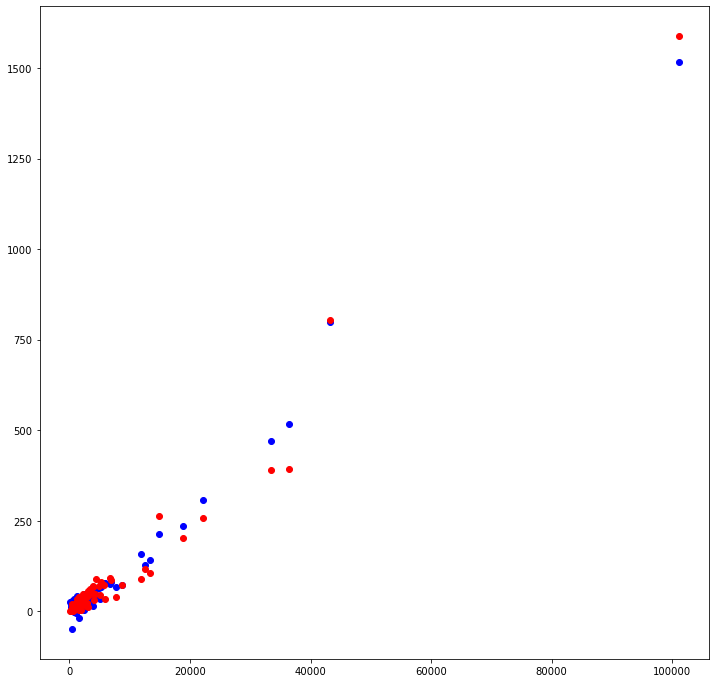

In [54]:

# Printing predicted values in blue and actual values in red, this regression appears to track very closely

fig, ax = plt.subplots(figsize=(12,12))
y_pred = lr.predict(X)
plt.scatter(X_Plot, y_pred, color='blue')
plt.scatter(compiledcountydata["Total Positive Cases"],compiledcountydata["Total Deaths"], color='red')
plt.show()